In [23]:
import glob
check = glob.glob("/content/drive/MyDrive/Colab Notebooks/OCR/Cinnamon_VN_data/train/" + '*')
print(len(check))
a = [0, 0, 0, 0, 0]
for x in check:
    x = x.split("/")[-1]
    try:
        a[int(x[0])] += 1
    except Exception as e:
        print(e)
print(a)

9116
invalid literal for int() with base 10: 'l'
[1823, 1823, 1823, 1823, 1823]


In [29]:
import os, os.path
DIR = "/content/drive/MyDrive/Colab Notebooks/OCR/Cinnamon_VN_data/train"
print(len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

9116


# Convert images

In [18]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from PIL import Image
from tqdm.auto import tqdm
import glob
import os

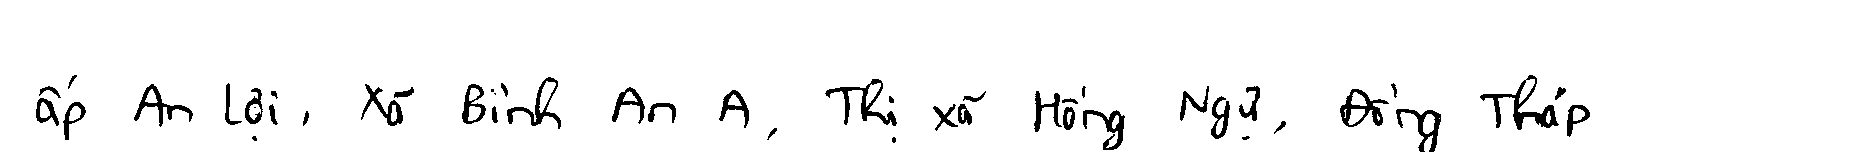

In [26]:
Image.open(train_path + "/10812_samples.png")

In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/OCR/Cinnamon_VN_data/train

/content/drive/MyDrive/Colab Notebooks/OCR/Cinnamon_VN_data/train


In [3]:
!rm -rf *.png

In [ ]:
check = glob.glob(train_path + '/*.png')

In [ ]:
len(check)

9115

In [ ]:
a = [0, 0, 0, 0, 0]
for x in check:
    x = x.split("/")[-1]
    a[int(x[0])] += 1

In [ ]:
a

[1823, 1823, 1823, 1823, 1823]

In [8]:
path = "/content/drive/MyDrive/Colab Notebooks/OCR/Cinnamon_VN_data/"

In [ ]:
validate_path = path +  "validate"
try:
    # Create target Directory
    os.mkdir(validate_path)
    print("Directory " , validate_path ,  " Created ") 
except FileExistsError:
    print("Directory " , validate_path ,  " already exists")

Directory  /content/drive/MyDrive/Colab Notebooks/OCR/Cinnamon_VN_data/validate  already exists


In [ ]:
olddir = path + "1015_Private Test/"
for imagefilenpath in glob.glob(olddir + '*.png'):
    image = cv2.imread(imagefilenpath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    se = cv2.getStructuringElement(cv2.MORPH_RECT, (8, 8))
    bg = cv2.morphologyEx(image, cv2.MORPH_DILATE, se)
    out_gray = cv2.divide(image, bg, scale=255)
    out_binary = cv2.threshold(out_gray, 0, 255, cv2.THRESH_OTSU)[1]

    imagefilename = imagefilenpath.split("/")[-1]
    cv2.imwrite(validate_path + "/" + imagefilename, out_binary)

In [19]:
train_path = path +  "train"
try:
    # Create target Directory
    os.mkdir(train_path)
    print("Directory " , train_path ,  " Created ") 
except FileExistsError:
    print("Directory " , train_path ,  " already exists")

Directory  /content/drive/MyDrive/Colab Notebooks/OCR/Cinnamon_VN_data/train  already exists


In [9]:
olddir = path + "0916_Data Samples 2/"
oldimages = glob.glob(olddir + '*.png')

In [10]:
len(oldimages)

1823

In [16]:
imagefilename = oldimages[0].split("/")[-1]
"4" + imagefilename

'40822_samples.png'

In [20]:
# olddir = path + "0916_Data Samples 2/"
for imagefilenpath in tqdm(oldimages):
    image = cv2.imread(imagefilenpath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    se = cv2.getStructuringElement(cv2.MORPH_RECT, (8, 8))
    bg = cv2.morphologyEx(image, cv2.MORPH_DILATE, se)
    out_gray = cv2.divide(image, bg, scale=255)
    out_binary = cv2.threshold(out_gray, 0, 255, cv2.THRESH_OTSU)[1]

    imagefilename = imagefilenpath.split("/")[-1]
    cv2.imwrite(train_path + "/" + "0" + imagefilename, out_binary)

    toppadding = cv2.copyMakeBorder(src=out_binary, top=50, bottom=0, left=0, right=0, borderType=cv2.BORDER_CONSTANT, value=[255, 255, 255])
    bottompadding = cv2.copyMakeBorder(src=out_binary, top=0, bottom=50, left=0, right=0, borderType=cv2.BORDER_CONSTANT, value=[255, 255, 255])
    leftpadding = cv2.copyMakeBorder(src=out_binary, top=0, bottom=0, left=100, right=0, borderType=cv2.BORDER_CONSTANT, value=[255, 255, 255])
    rightpadding = cv2.copyMakeBorder(src=out_binary, top=0, bottom=0, left=0, right=100, borderType=cv2.BORDER_CONSTANT, value=[255, 255, 255])

    cv2.imwrite(train_path + "/" + "1" + imagefilename, toppadding)
    cv2.imwrite(train_path + "/" + "2" + imagefilename, bottompadding)
    cv2.imwrite(train_path + "/" + "3" + imagefilename, leftpadding)
    cv2.imwrite(train_path + "/" + "4" + imagefilename, rightpadding)

# Create new labels.json

In [ ]:
import json

In [ ]:
with open("/content/drive/MyDrive/Colab Notebooks/OCR/Cinnamon_VN_data/train/labels.json", "r") as jsonfile:
    data = json.load(jsonfile)

In [ ]:
new_data = {}
for key in tqdm(data.keys()):
    for i in range(5):
        new_data[str(i) + key] = data[key]

In [ ]:
new_data

{'00000_samples.png': 'Số 253 đường Trần Phú, Thị trấn Nam Sách, Huyện Nam Sách, Hải Dương',
 '10000_samples.png': 'Số 253 đường Trần Phú, Thị trấn Nam Sách, Huyện Nam Sách, Hải Dương',
 '20000_samples.png': 'Số 253 đường Trần Phú, Thị trấn Nam Sách, Huyện Nam Sách, Hải Dương',
 '30000_samples.png': 'Số 253 đường Trần Phú, Thị trấn Nam Sách, Huyện Nam Sách, Hải Dương',
 '40000_samples.png': 'Số 253 đường Trần Phú, Thị trấn Nam Sách, Huyện Nam Sách, Hải Dương',
 '00001_samples.png': 'Số 289 Đinh Bộ Lĩnh, Phường 26, Quận Bình Thạnh, TP Hồ Chí Minh',
 '10001_samples.png': 'Số 289 Đinh Bộ Lĩnh, Phường 26, Quận Bình Thạnh, TP Hồ Chí Minh',
 '20001_samples.png': 'Số 289 Đinh Bộ Lĩnh, Phường 26, Quận Bình Thạnh, TP Hồ Chí Minh',
 '30001_samples.png': 'Số 289 Đinh Bộ Lĩnh, Phường 26, Quận Bình Thạnh, TP Hồ Chí Minh',
 '40001_samples.png': 'Số 289 Đinh Bộ Lĩnh, Phường 26, Quận Bình Thạnh, TP Hồ Chí Minh',
 '00002_samples.png': 'Số 246E/2, Khu phố 1B, Phường An Phú, Tx Thuận An, Bình Dương',
 '1

In [ ]:
with open("/content/drive/MyDrive/Colab Notebooks/OCR/Cinnamon_VN_data/train/labels.json", "w", encoding="utf8") as jsonfile:
    json.dump(new_data, jsonfile, ensure_ascii=False)